In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [2]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import time


2024-11-17 14:02:55.885362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-17 14:02:55.885423: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 14:02:55.886953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load the balanced training dataset
balanced_train = pd.read_csv("../input/emnist/emnist-balanced-train.csv")
# Load the balanced testing dataset
balanced_test = pd.read_csv("../input/emnist/emnist-balanced-test.csv")
# Load the mapping
mapp = pd.read_csv("../input/emnist/emnist-balanced-mapping.txt", delimiter=' ', index_col=0, header=None)

In [4]:
#printing shapes 
print(f"""
Train: {balanced_train.shape}
Test:  {balanced_test.shape}
Map:   {mapp.shape}
""")


Train: (112799, 785)
Test:  (18799, 785)
Map:   (47, 1)



In [5]:
# Create keys as integers from 0 to the length of the mapping values
keys = range(len(mapp[1].values)) 

# Convert the integer values to corresponding characters using ASCII
values = [chr(v) for v in mapp[1].values]

# Create a dictionary mapping integers to characters
map_dict = dict(zip(keys, values))
map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [6]:
#splliting target coloumn and features from train and test dataset
#training
X_train = np.array(balanced_train.iloc[:,1:].values)
y_train = np.array(balanced_train.iloc[:,0].values)

#testing
X_test = np.array(balanced_test.iloc[:,1:].values)
y_test = np.array(balanced_test.iloc[:,0].values)

print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (112799, 784)
y_train: (112799,)
x_test: (18799, 784)
y_test: (18799,)


In [7]:
#displaying the no of classes
column_name = '45'
if column_name in balanced_train.columns:
    classes = len(balanced_train[column_name].unique())
    print(f"number of classes  : {classes}") 
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

number of classes  : 47


In [8]:
#storing no of classes in classes variable for input size for output layers
classes = len(balanced_train['45'].unique()) 
print('number of classes : ', classes) 

number of classes :  47


In [9]:
def rotate_emnist(x_data):
    
    x_data = x_data.reshape(x_data.shape[0], 28, 28)
    x_data = np.transpose(x_data,(0,2,1))
    
    return(x_data)

X_train = rotate_emnist(X_train)
X_test = rotate_emnist(X_test)

In [10]:
# Normalise and reshape data
X_train = X_train.astype('float32')  / 255.0
X_test = X_test.astype('float32')  / 255.0

In [11]:
# One hot encoding
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)
print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (112799, 28, 28)
y_train: (112799, 47)
x_test: (18799, 28, 28)
y_test: (18799, 47)


# Create the MLP Model

In [12]:
# Flatten the images from 28x28 dimensions and normalize them
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

print("x_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",X_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (112799, 784)
y_train :  (112799, 47)
x_test  :  (18799, 784)
y_test  :  (18799, 47)


In [13]:
# Define the model
model1 = Sequential()

# Input layer
# Define the input layer with the shape corresponding to flattened 28x28 images
model1.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Add the first hidden layer with 512 units and ReLU activation function
model1.add(tf.keras.layers.Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model1.add(tf.keras.layers.Dropout(0.3))

# Hidden Layer
# Adding the first hidden layer with 256 units and ReLU activation function.
model1.add(tf.keras.layers.Dense(256, activation='relu'))  # hidden layer 1

# Adding a dropout layer with a rate of 0.3 to reduce overfitting.
model1.add(tf.keras.layers.Dropout(0.3))

# Adding the second hidden layer with 128 units and ReLU activation function.
model1.add(tf.keras.layers.Dense(128, activation='relu'))  # hidden layer 2

# Adding another dropout layer with a rate of 0.3 to enhance generalization.
model1.add(tf.keras.layers.Dropout(0.3))

# Output Layer
# Output layer: Using softmax activation for multi-class classification.
model1.add(tf.keras.layers.Dense(47, activation='softmax'))

In [14]:
# Summary of the model
model1.summary()

optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust optimizer and learning rate
model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 572,207 (2.18 MB)

 Trainable params: 572,207 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=0, restore_best_weights=True, patience=3, mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

In [16]:
batch_size  = 256
epochs      =  30

start_time1 = time.time()
history1 = model1.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=[MCP,ES,RLP])
stop_time1 = time.time()

# Calculate elapsed time
elapsed_time1 = stop_time1 - start_time1
minutes1 = int(elapsed_time1 // 60)
seconds1 = int(elapsed_time1 % 60)

# Print time used in minutes and seconds
print(f'training_time1 = {minutes1} min {seconds1} sec')

Epoch 1/30
 59/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1076 - loss: 3.4894

I0000 00:00:1731852197.389423    1829 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1731852197.406717    1829 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3912 - loss: 2.2374

W0000 00:00:1731852202.938511    1831 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.76743, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.3915 - loss: 2.2359 - val_accuracy: 0.7674 - val_loss: 0.7434 - learning_rate: 0.0010
Epoch 2/30
426/441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.9112
Epoch 2: val_accuracy improved from 0.76743 to 0.80435, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7162 - loss: 0.9095 - val_accuracy: 0.8044 - val_loss: 0.6024 - learning_rate: 0.0010
Epoch 3/30
431/441 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7596 - loss: 0.7434
Epoch 3: val_accuracy improved from 0.80435 to 0.81659, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7597 - loss: 0.7430 - val_accuracy: 0.8166 - val_loss: 0.5516 - learning_rate: 0.0010
Epoch 4/30
431/441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7861 - loss: 0.6597
Epoch 4: val_accuracy improved from 0.81659 to 0.

In [17]:
score = model1.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

W0000 00:00:1731852227.401072    1831 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test loss     : 0.4268
Test accuracy : 0.8562


W0000 00:00:1731852228.644348    1830 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


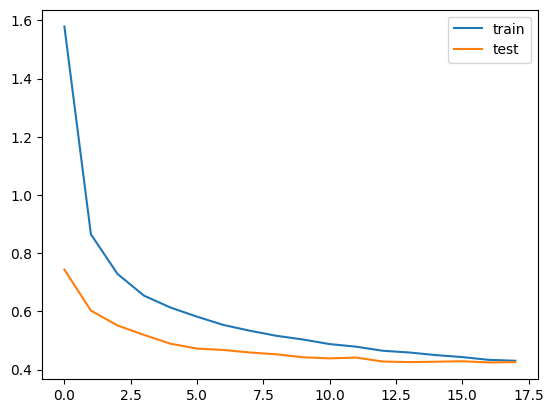

In [18]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()

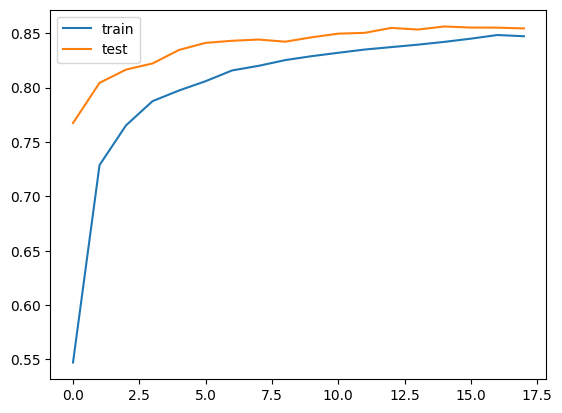

In [19]:
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()

# Create the CNN Model

In [20]:
# Reshaping all images into 28*28*1 for pre-processing 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) 
#displaying shapes for split data for model testing and validation purpose
print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (112799, 28, 28, 1)
y_train: (112799, 47)
x_test: (18799, 28, 28, 1)
y_test: (18799, 47)


In [38]:
# Define the model
model2 = Sequential()

# Input layer
model2.add(keras.layers.Input(shape=(28, 28, 1)))

# Convolutional Layer 1
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

# Convolutional Layer 2
model2.add(Conv2D(16, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

# Flatten and Fully Connected Layers
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))

# Output Layer
model2.add(Dense(47, activation='softmax'))

In [39]:
# Summary of the model
model2.summary()

optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust optimizer and learning rate
model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 47)             │         4,747 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,095 (180.06 KB)

 Trainable params: 46,095 (180.06 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=0, restore_best_weights=True, patience=3, mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

In [24]:
batch_size  = 256
epochs      =  30

start_time2 = time.time()
history2 = model2.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=[MCP,ES,RLP])
stop_time2 = time.time()

# Calculate elapsed time
elapsed_time2 = stop_time2 - start_time2
minutes2 = int(elapsed_time2 // 60)
seconds2 = int(elapsed_time2 % 60)

# Print time used in minutes and seconds
print(f'training_time2 = {minutes2} min {seconds2} sec')

Epoch 1/30
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2496 - loss: 2.8128
Epoch 1: val_accuracy improved from -inf to 0.73531, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2499 - loss: 2.8111 - val_accuracy: 0.7353 - val_loss: 0.8933 - learning_rate: 0.0010
Epoch 2/30
438/441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6121 - loss: 1.2662
Epoch 2: val_accuracy improved from 0.73531 to 0.78206, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6123 - loss: 1.2656 - val_accuracy: 0.7821 - val_loss: 0.6996 - learning_rate: 0.0010
Epoch 3/30
434/441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6683 - loss: 1.0562
Epoch 3: val_accuracy improved from 0.78206 to 0.80510, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6685 - loss: 1.0557 - val_accuracy: 0.8051 - val_loss: 0.6260 - learning_rate: 0.0010
Epoch 4/30
437/441 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [25]:
score = model2.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.4251
Test accuracy : 0.8565


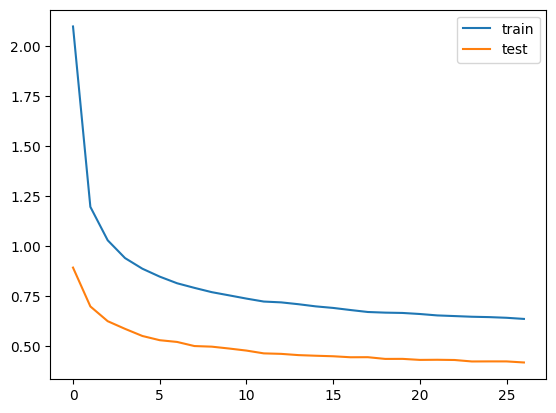

In [26]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()

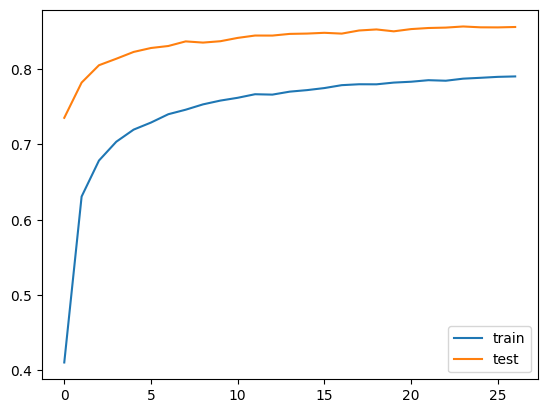

In [27]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


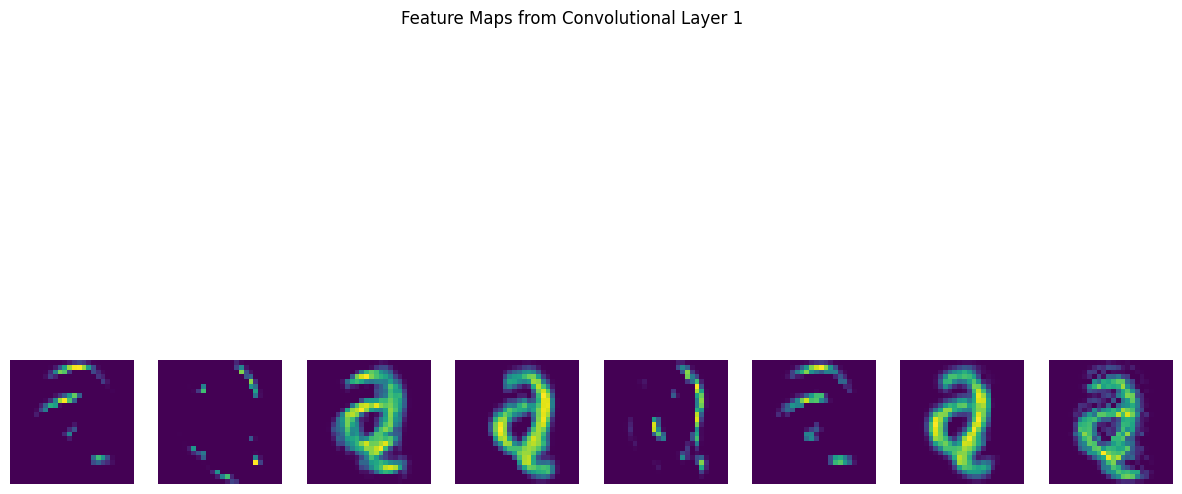

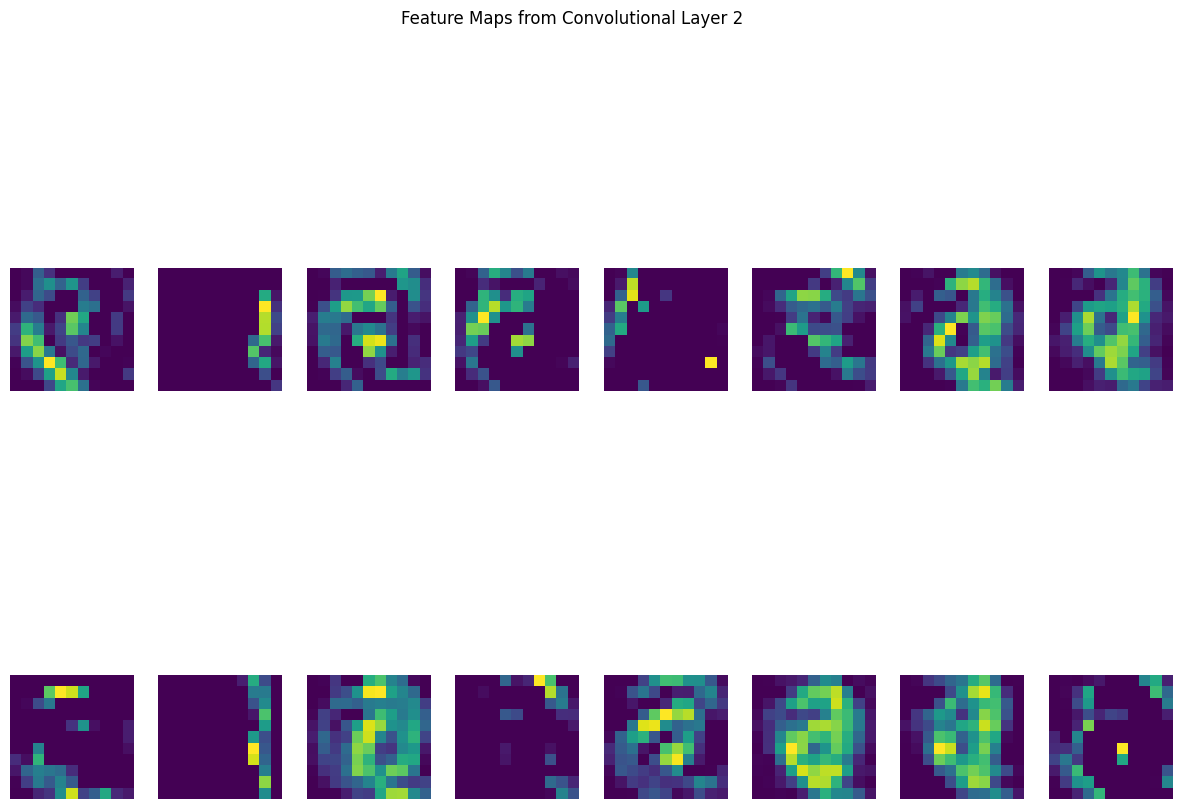

In [44]:
import matplotlib.pyplot as plt
from keras.models import Model

# Choose an image from the dataset
image = X_train[0]  # Select the first training image
image = image.reshape(1, 28, 28, 1)  # Add batch dimension

# Define a new model to output feature maps of the convolutional layers
input_tensor = model2.layers[0].input

layer_outputs = [layer.output for layer in model2.layers if 'conv' in layer.name]
feature_map_model = Model(inputs=input_tensor, outputs=layer_outputs)

# Get feature maps for the selected image
feature_maps = feature_map_model.predict(image)

# Visualize feature maps
for layer_index, feature_map in enumerate(feature_maps):
    num_filters = feature_map.shape[-1]  # Number of filters in the layer
    plt.figure(figsize=(15, 15))
    for i in range(num_filters):
        plt.subplot(num_filters // 8 + 1, 8, i + 1)  # 8 columns
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f'Feature Maps from Convolutional Layer {layer_index + 1}')
    plt.show()



# Create the ResNet Model

In [28]:
# Residual block definition
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    # First convolution
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    # Second convolution
    x = Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    # Add shortcut connection
    if stride != 1:  # If stride changes, adjust shortcut to match dimensions
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Input layer
input_layer = Input(shape=(28, 28, 1))

# Initial convolution and pooling
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

# Add residual blocks
x = residual_block(x, filters=16)
x = residual_block(x, filters=32, stride=2)
x = residual_block(x, filters=64, stride=2)

# Global average pooling and fully connected layers
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(47, activation='softmax')(x)

# Define the ResNet model
model3 = Model(inputs=input_layer, outputs=output_layer)

In [29]:
# Summary of the model
model3.summary()

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust optimizer and learning rate
model3.compile(optimizer=optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │        160 │ input_layer_2[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │      2,320 │ max_pooling2d_2[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 14, 14,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 14, 14,    │      2,320 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 14, 14,    │          0 │ add[0][0]         │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 7, 7, 32)  │      4,640 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 7, 7, 32)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 7, 7, 32)  │      9,248 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 7, 7, 32)  │        544 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 7, 7, 32)  │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat

 Total params: 89,295 (348.81 KB)

 Trainable params: 88,655 (346.31 KB)

 Non-trainable params: 640 (2.50 KB)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=0, restore_best_weights=True, patience=3, mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

In [31]:
# Training configuration
batch_size = 256
epochs = 30

# Training the model
start_time3 = time.time()
history3 = model3.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP])
stop_time3 = time.time()

# Calculate elapsed time
elapsed_time3 = stop_time3 - start_time3
minutes3 = int(elapsed_time3 // 60)
seconds3 = int(elapsed_time3 % 60)
print(f'training_time3 = {minutes3} min {seconds3} sec')

Epoch 1/30
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3487 - loss: 2.4099
Epoch 1: val_accuracy improved from -inf to 0.71291, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.3492 - loss: 2.4079 - val_accuracy: 0.7129 - val_loss: 0.8945 - learning_rate: 0.0010
Epoch 2/30
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8009 - loss: 0.6067
Epoch 2: val_accuracy improved from 0.71291 to 0.81760, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8009 - loss: 0.6066 - val_accuracy: 0.8176 - val_loss: 0.5282 - learning_rate: 0.0010
Epoch 3/30
439/441 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8353 - loss: 0.4941
Epoch 3: val_accuracy improved from 0.81760 to 0.84680, saving model to Best_points.keras
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8353 - loss: 0.4940 - val_accuracy: 0.8468 - val_loss: 0.4529 - learning_rate: 0.0010
Epoch 4/30
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

In [32]:
score = model3.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.3261
Test accuracy : 0.8882


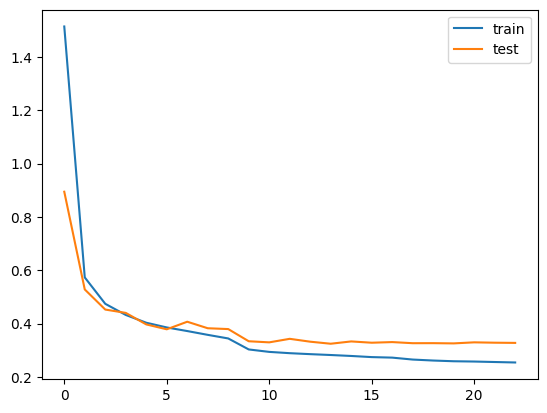

In [33]:
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()

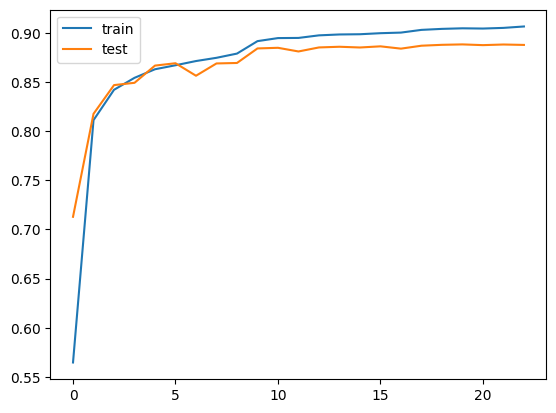

In [34]:
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='test')
plt.legend()